In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [24]:
df = pd.read_csv("data.csv")
print(df.head(2))

   CustomerID  Age Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49   Male       4           88.35  Month-to-Month   
1           2   43   Male       0           36.67  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic         353.4         Yes   Yes  
1     Fiber Optic           0.0         Yes   Yes  


In [25]:
#collecting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [26]:
# missing values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [27]:
# filling the null values
df["InternetService"] = df["InternetService"].fillna("")
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
# detecting outlier for all numerical columns

def outlier_detection(df):
    selected_columns = np.array(df.select_dtypes(include=['float','int']).columns)

    outlier_description = {}

    for col in selected_columns:

        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.75)

        iqr = q2 - q1

        # define the boundary for outlier

        lower_bound = q1  - 1.5* iqr
        upper_bound = q2 + 1.5 * iqr

        # countring outlier
        # outlier_count = len(df[(df[col]<lower_bound) | (df[col]>upper_bound)]) 
        # outlier_description[col] = outlier_count
        df = df[(df[col]>lower_bound) & (df[col]< upper_bound)]

    return df

df = outlier_detection(df)
print(clean_df)

     CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
1             2   43    Male       0           36.67  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
..          ...  ...     ...     ...             ...             ...   
994         995   34  Female       1           78.63  Month-to-Month   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport Churn  
0       Fiber Optic        353.40         Yes   Yes  
1       Fiber Optic        

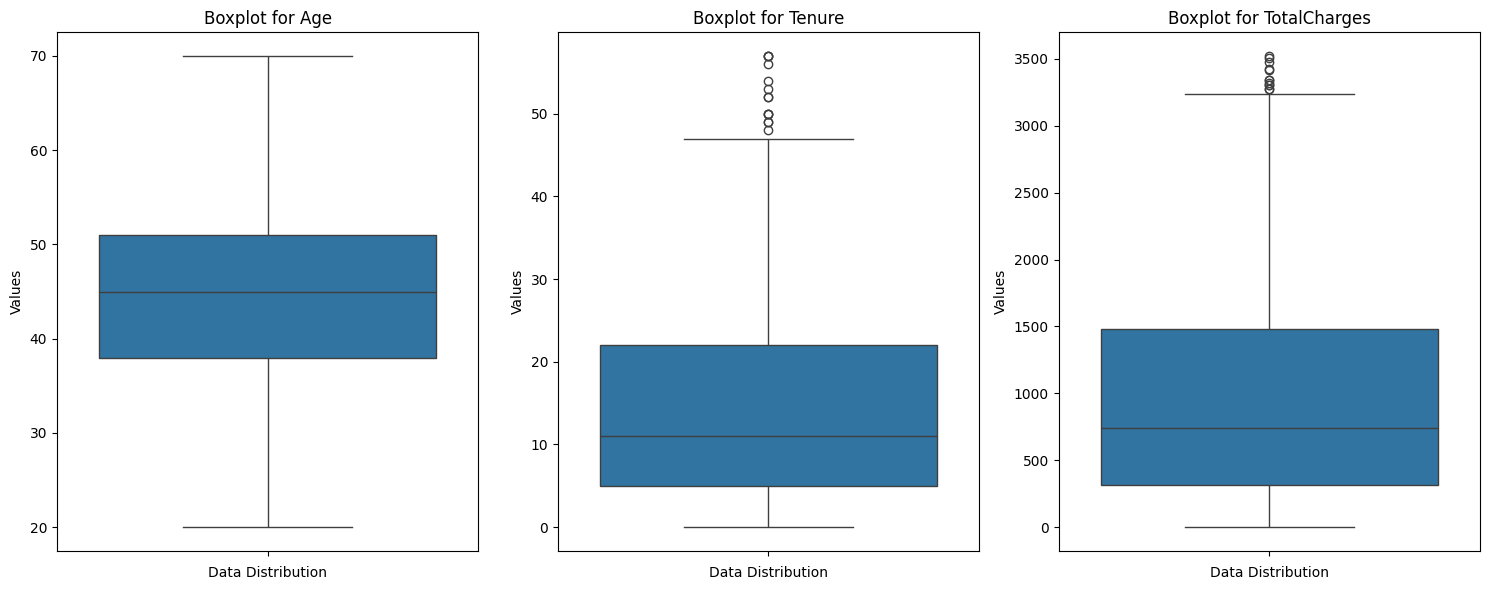

In [30]:
# Visualize columns with outliers using subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of columns with outliers
columns_with_outliers = [column for column, count in outliers_summary.items() if count > 0]

# Define the number of subplots
num_columns = len(columns_with_outliers)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 6), sharey=False)

# Create a boxplot for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}")
    axes[i].set_xlabel("Data Distribution")
    axes[i].set_ylabel("Values")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [31]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,506.349831,44.610799,14.211474,73.213735,994.996164
std,291.397511,9.538172,12.067950,25.443375,868.717710
min,1.000000,20.000000,0.000000,30.000000,0.000000
25%,256.000000,38.000000,5.000000,51.040000,315.090000
50%,512.000000,45.000000,11.000000,71.960000,738.000000
75%,759.000000,51.000000,22.000000,94.320000,1483.720000
max,1000.000000,70.000000,57.000000,119.960000,3522.000000


In [32]:
# now I would be interested in correlation of these values
numeric_columns_data = df.select_dtypes(include=["number"])
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.035622,0.039154,-0.025211,0.026416
Age,0.035622,1.000000,-0.000047,-0.026143,-0.017047
Tenure,0.039154,-0.000047,1.000000,-0.148283,0.861863
MonthlyCharges,-0.025211,-0.026143,-0.148283,1.000000,0.259103
TotalCharges,0.026416,-0.017047,0.861863,0.259103,1.000000


In [33]:
df[df["Churn"]=="No"]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
11,12,40,Female,19,36.18,One-Year,Fiber Optic,687.42,Yes,No
25,26,46,Male,25,35.98,Two-Year,DSL,899.50,Yes,No
26,27,33,Female,18,98.99,One-Year,Fiber Optic,1781.82,Yes,No
37,38,25,Female,23,47.55,One-Year,Fiber Optic,1093.65,Yes,No
...,...,...,...,...,...,...,...,...,...,...
946,947,29,Female,15,98.06,One-Year,Fiber Optic,1470.90,Yes,No
950,951,42,Male,13,52.58,One-Year,DSL,683.54,Yes,No
956,957,48,Female,18,60.54,One-Year,Fiber Optic,1089.72,Yes,No
963,964,52,Male,45,66.06,Two-Year,DSL,2972.70,Yes,No


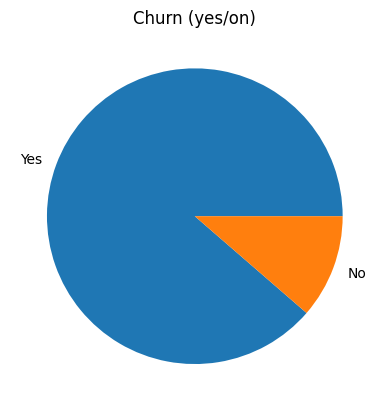

In [34]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (yes/on)")
plt.ylabel("")
plt.show()

In [35]:
# grouping by churn and get the value the mean of monthlycharges 
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.722970
Yes    74.558363
Name: MonthlyCharges, dtype: float64

In [36]:
# curious about how churn happens with gender
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    66.493220
       Male      57.426667
Yes    Female    73.474033
       Male      75.789621
Name: MonthlyCharges, dtype: float64

In [37]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     24.792079
Yes    12.855330
Name: Tenure, dtype: float64

In [38]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.475248
Yes    44.756345
Name: Age, dtype: float64

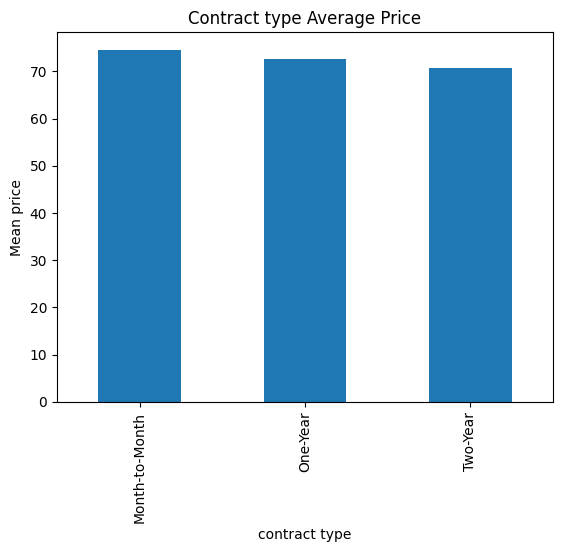

In [39]:
# monthly charges decreases with increament of the contract time
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean price")
plt.xlabel("contract type")
plt.title("Contract type Average Price")
plt.show()

In [40]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


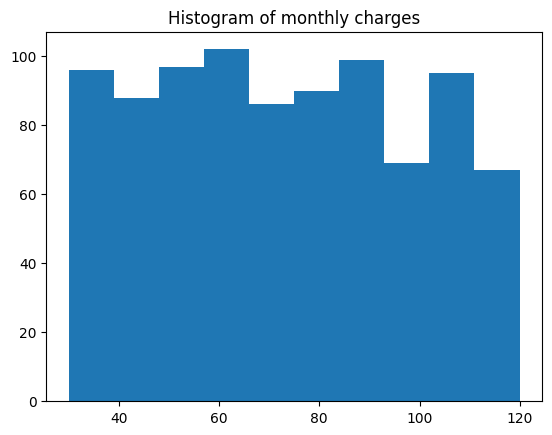

In [41]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of monthly charges")
plt.show()

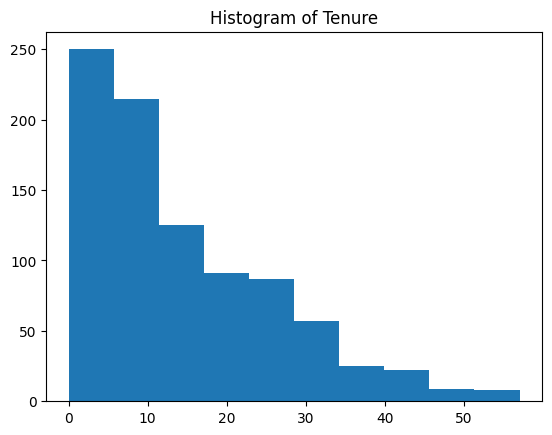

In [42]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

* Starting the feature engineering

In [43]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [44]:
y = df[["Churn"]]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [45]:
y.head()
# y["Churn"].unique()

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [46]:
# we need all values in numeric format for prediction
mapping = {"Female":1, "Male":0}
x["Gender"]=x["Gender"].map(mapping)

C:\Users\banig\AppData\Local\Temp\ipykernel_41472\956959229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=x["Gender"].map(mapping)


In [47]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [48]:

y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)
y["Churn"].unique()

C:\Users\banig\AppData\Local\Temp\ipykernel_41472\907273524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)


array([1, 0])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42, stratify=y )
# y_train["Churn"].unique()

In [50]:
# since the values of the attributes are in different range, we need to scale them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [51]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = y_train["Churn"]
y_test = y_test["Churn"]
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)

In [52]:
y_train

226    1
997    1
945    1
588    1
9      1
      ..
994    1
562    1
255    1
912    1
696    1
Name: Churn, Length: 711, dtype: int64

In [53]:
# as we have seen dataset is highly imbalance,
# we will use SMOTE to reduce the effect of less minority
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# x_train_bl, y_train_bl = smote.fit_resample(x_train,y_train)



# over sampling did not work well as per the model performance score



* Model development

In [54]:
from sklearn.metrics import accuracy_score

def performance_score(prediction):
    print("The accuracy of the model is {}".format(accuracy_score(y_test,prediction)))

* Logistic Regression

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [56]:
pred_model = LogisticRegression()
pred_model.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
prediction = pred_model.predict(x_test)
performance_score(prediction)

The accuracy of the model is 0.8764044943820225


* K-NN classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
param_grid = {
    "n_neighbors":[2,3,4,7,9],
    "weights": ["uniform","distance"],
}

In [60]:
gridknn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
gridknn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [61]:
prediction = gridknn.best_estimator_.predict(x_test)
performance_score(prediction)

The accuracy of the model is 0.8764044943820225


* SVM classifier

In [62]:
from sklearn.svm import SVC
svm = SVC()

In [63]:
param_grid = {
    "C":[0.01,0.1,.5,1.0],
    "kernel": ["linear","rbf","poly"]
}

In [64]:
gridsvm = GridSearchCV(svm,param_grid,cv = 5)
gridsvm.fit(x_train,y_train)
gridsvm.best_params_


{'C': 0.01, 'kernel': 'linear'}

In [65]:
prediction = gridsvm.best_estimator_.predict(x_test)
performance_score(prediction)


The accuracy of the model is 0.8876404494382022


* Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
param_grid = {
    "criterion":["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [68]:
gridtree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
gridtree.fit(x_train,y_train)
gridtree.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [69]:
predict = gridtree.best_estimator_.predict(x_test)
performance_score(predict)

The accuracy of the model is 0.8764044943820225


* Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
param_grid = {
    "n_estimators":[5,10,20,40],
    "max_depth" : [5,10,14],
    "max_features" : [2,3,4],
    "bootstrap" : [True,False]

}

In [72]:
gridrf = GridSearchCV(RandomForestClassifier(),param_grid, cv =5)
gridrf.fit(x_train,y_train)
gridrf.best_params_

{'bootstrap': False, 'max_depth': 5, 'max_features': 2, 'n_estimators': 40}

In [73]:
predict = gridrf.best_estimator_.predict(x_test)
performance_score(predict)


The accuracy of the model is 0.8876404494382022


* Picking up best model

In [74]:
best_model = gridsvm.best_estimator_
with open("bestmodel.pkl","wb") as f:
    pickle.dump(best_model,f)